In [1]:
from causalinfo import *
# You only need this if you want to draw pretty pictures of the Networksa
from nxpd import draw, nxpdParams
nxpdParams['show'] = 'ipynb'

In [2]:
switch = Variable("S", 2)
dial = Variable("D", 10)
audio = Variable("A", 10+1) # 10 + silence

In [3]:
def radio(switch, dial, audio):
    if switch == 0:
        audio[0] = 1.0
    else:
        audio[dial+1] = 1.0

In [4]:
r_eq = Equation('Radio', [switch, dial], [audio], radio)

In [5]:
r_eq

In [6]:
radio_c = CausalGraph([r_eq])

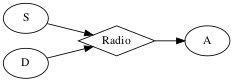

In [7]:
draw(radio_c.full_network)

In [8]:
radio_dist = JointDist({switch: [.1, .9], dial: [1.0/10] * 10})

In [9]:
radio_dist

In [10]:
radio_c.generate_joint(radio_dist)#.mutual_info(audio, dial)